In [3]:
import os
import sys
from time import sleep
from time import time

import numpy as np
from adbutils import adb
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
from ppadb.client import Client as AdbClient


client = AdbClient(host="127.0.0.1", port=5037)

device = client.device("8AFY0K7DR")


def get_screenshot(file_name="test.png"):

    result = device.screencap()
    with open(file_name, "wb") as fp:
        fp.write(result)

    return file_name


def show_screenshot():
    display(Image.open(get_screenshot("tmp")))
    os.remove("tmp")


def data2array(data):
    return np.asarray(data)


def read_png(name):
    return data2array(plt.imread(name))

map_array = read_png("map.png")                                   
start_array = read_png("start.png")[200:, :, :]                   
                                                                  
d = adb.device()                                                  
                                                                  
for i in range(1000):                                             
    print(i)                                                      
    loop_time = time()                                            
    flag = 1                                                      
                                                                  
    while True:                                                   
        screen = read_png(get_screenshot(file_name="now.png"))    
        os.remove("./now.png")                                    
        print("start_checker")                                    
        print(abs(start_array - screen[200:, :, :]).mean())       
        print("map_checker")                                      
        print(abs(map_array - screen).mean())                     
                                                                  
        if time() - loop_time > 300:                              
            print(str(time() - loop_time) + " has passed")        
            sys.exit()                                            
                                                                  
        elif abs(start_array - screen[200:, :, :]).mean() < 0.01: 
            d.click(2555, 1333)                                   
            flag += 1                                             
            print("start_find")                                   
            print(time() - loop_time)                             
            print("=" * 20)                                       
            sleep(1)                                              
            d.click(2430, 1000)                                   
            print("sleeping")                                     
            sleep(155)                                            
            print("sleep finished")                               
            print(time() - loop_time)                             
            d.click(1500, 200)                                    
            sleep(3)                                              
                                                                  
            break                                                 
        elif abs((map_array - screen)).mean() < 0.2:              
            # d.click(1920,746)                                   
            d.click(2100, 560)                                    
            print("map_find")                                     
            print(time() - loop_time)                             
            print("=" * 20)                                       
            print()
            sleep(0.5)
        else:                                                     
            d.click(1500, 200)                                    
            sleep(4)                                              
            print("pass")                                         
d.keyevent("HOME")                                                


0
start_checker
0.1808898
map_checker
0.0021195011
map_find
3.427396535873413

start_checker
0.16605683
map_checker
0.10413057
map_find
6.804975748062134



KeyboardInterrupt: 

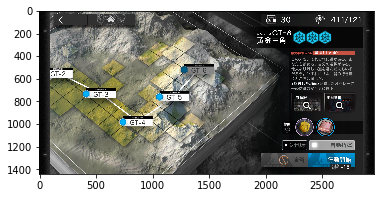

In [8]:
plt.imshow(screen)

In [9]:
abs(start_array - screen[200:, :, :]).mean() < 0.01

True

In [4]:
d.click(2555, 1333)    

''

In [7]:
screen = read_png(get_screenshot(file_name="now.png"))    
os.remove("./now.png")    